# Quick and Safe

In [1]:
from settings.environment import Environment
from settings.coord import Coord
from roadmap.visibility_roadmap import VisibilityRoadmap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from shapely.geometry import Point
from settings.threat import Threat
from roadmap.prm import PRM
from roadmap.grid import Grid
from algorithms.geometric import contact_points_given_circle_and_point

## environment

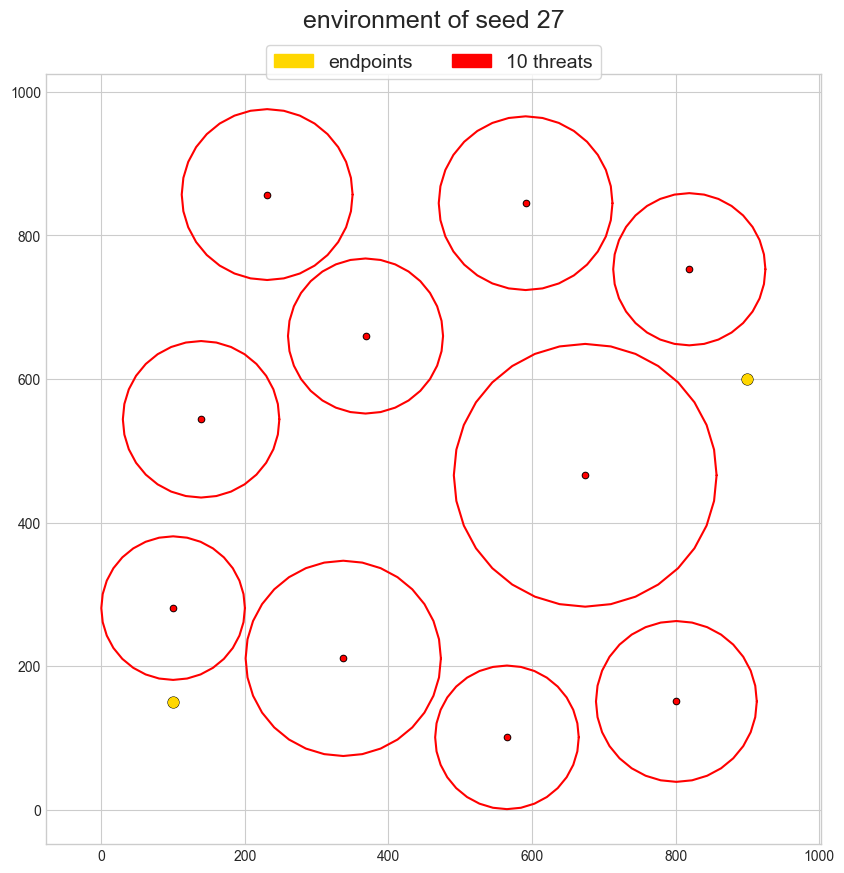

In [2]:
env = Environment(source=Coord(100,150), target=Coord(900,600), num_threats=10, seed_value=27)
env.plot()
plt.title(f'environment of seed {env._seed_value}', fontsize=18, y=1.05)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True)

plt.savefig(f'../plots/environment_of_seed_{env._seed_value}.png')
plt.show()

## shortest and safest

In [4]:
rm = VisibilityRoadmap(env)
shortest_path, shortest_length, shortest_risk, shortest_time = rm.shortest_path(weight='length')
safest_path, safest_length, safest_risk, safest_time = rm.shortest_path(weight='risk')

KeyboardInterrupt: 

In [ ]:
rm.plot(display_edges=False)
plt.plot([p.x for p in shortest_path], [p.y for p in shortest_path], color='blue', linestyle='dashed', linewidth=3)
plt.plot([p.x for p in safest_path], [p.y for p in safest_path], color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'shortest path (length: {shortest_length}, risk: {shortest_risk}), computation time: {shortest_time}s'),
                    Line2D([0], [0], color='green', linestyle='dashed', label=f'safest path (length: {safest_length}, risk: {safest_risk}), computation time: {safest_time}s')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/shortest_and_safest_path_examples.png')
plt.show()

## one radar

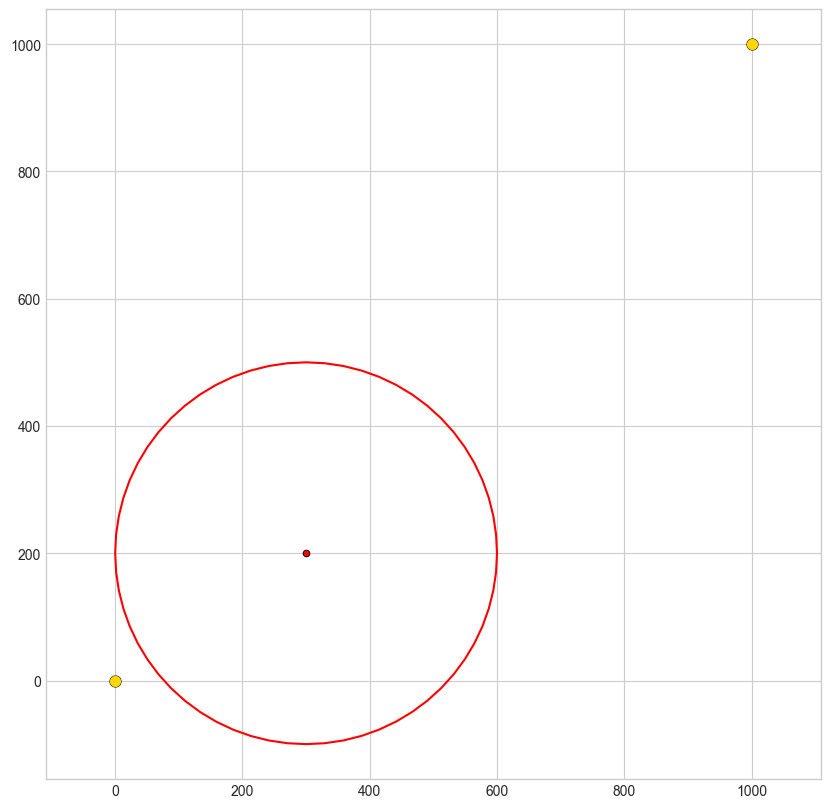

In [2]:
source=Coord(0,0)
target=Coord(1000,1000)
threat = Threat(center=Coord(300,200), radius=300)
env = Environment(source=Coord(0,0), target=Coord(1000,1000), num_threats=1, seed_value=27)
env._threats = [threat]
env.plot()

In [3]:
visibility = VisibilityRoadmap(env)

In [4]:
# grid = Grid(env)

In [5]:
# visibility.merge_graph(grid.graph, merge_radius=20)

In [6]:
rm = visibility

In [7]:
constrained_path_100, constrained_length_100, constrained_risk_100, constrained_time_100 = rm.constrained_shortest_path(weight='length', constraint='risk', budget=100)

In [8]:
constrained_path_200, constrained_length_200, constrained_risk_200, constrained_time_200 = rm.constrained_shortest_path(weight='length', constraint='risk', budget=200)

In [9]:
constrained_path_300, constrained_length_300, constrained_risk_300, constrained_time_300 = rm.constrained_shortest_path(weight='length', constraint='risk', budget=300)

In [10]:
constrained_path_500, constrained_length_500, constrained_risk_500, constrained_time_500 = rm.constrained_shortest_path(weight='length', constraint='risk', budget=500)

In [11]:
[constrained_risk_100, constrained_risk_200, constrained_risk_300, constrained_risk_500]

[91.477, 295.078, 498.058]

In [12]:
# refined_path = rm.refine_path(constrained_path)
# path_attributes = env.compute_path_attributes(refined_path)
# refined_length, refined_risk = path_attributes['length'], path_attributes['risk']

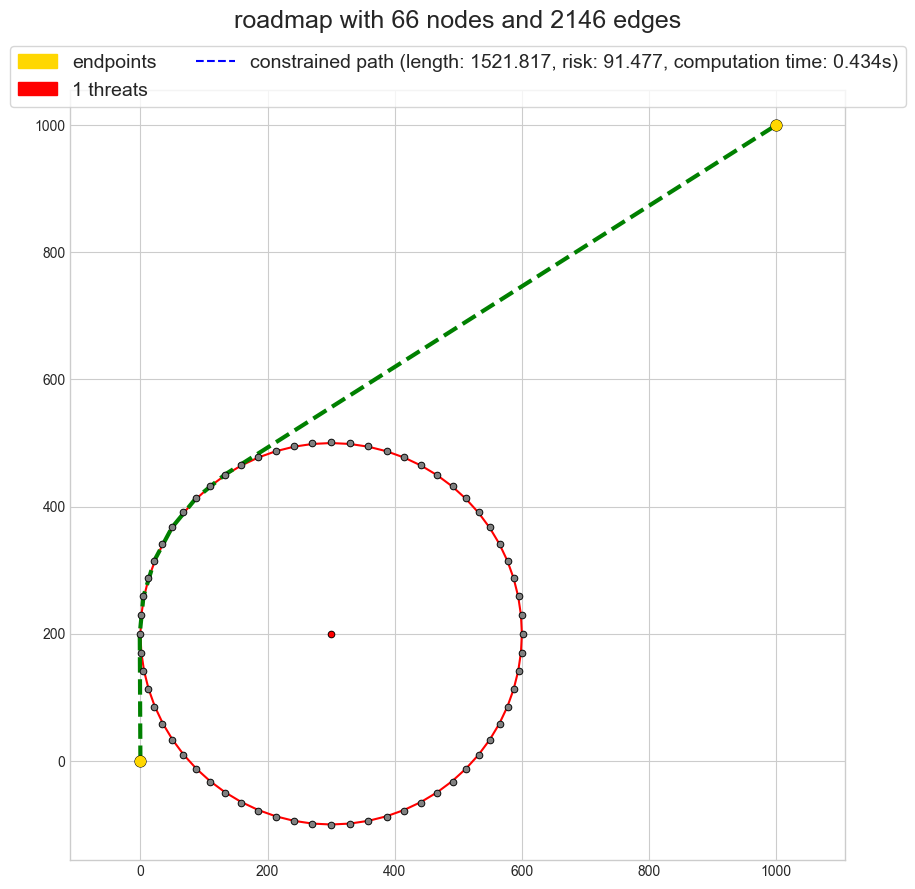

In [13]:
path, risk, length, time = constrained_path_100, constrained_risk_100, constrained_length_100, constrained_time_100
rm.plot(display_edges=False)
plt.plot([p.x for p in path], [p.y for p in path],
         color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'constrained path (length: {length}, risk: {risk}, computation time: {time + 0}s)')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/constrained_path_examples_100.png')
plt.show()

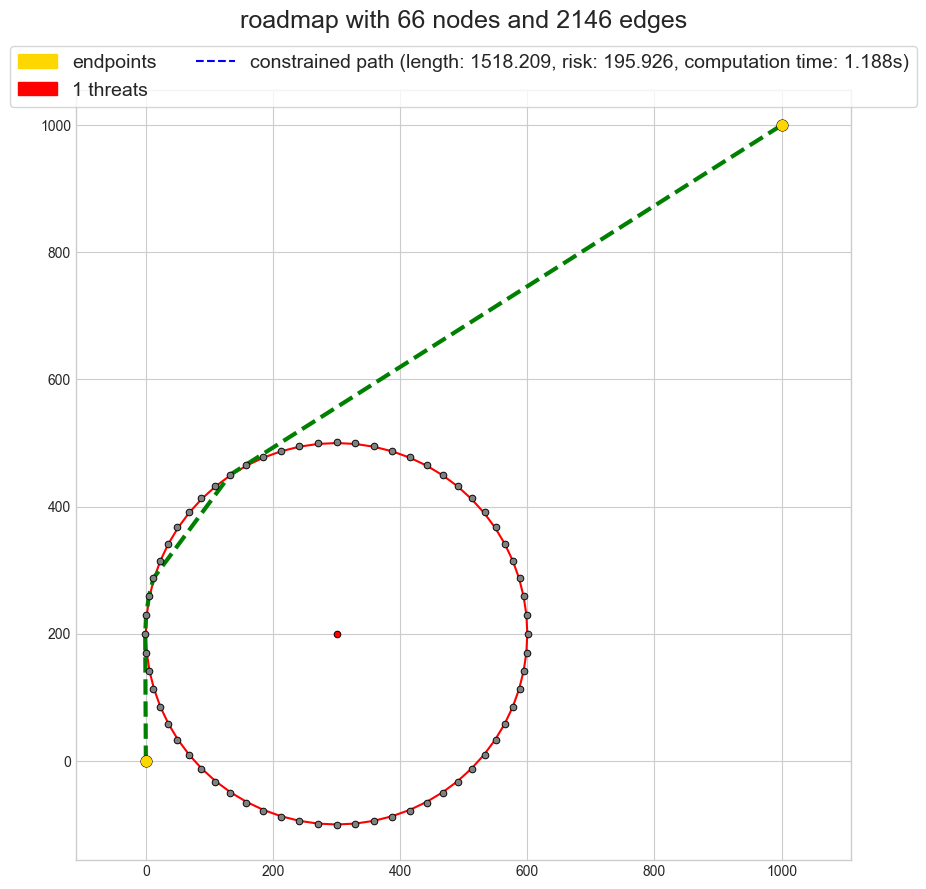

In [14]:
path, risk, length, time = constrained_path_200, constrained_risk_200, constrained_length_200, constrained_time_200
rm.plot(display_edges=False)
plt.plot([p.x for p in path], [p.y for p in path],
         color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'constrained path (length: {length}, risk: {risk}, computation time: {time + 0}s)')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/constrained_path_examples_200.png')
plt.show()

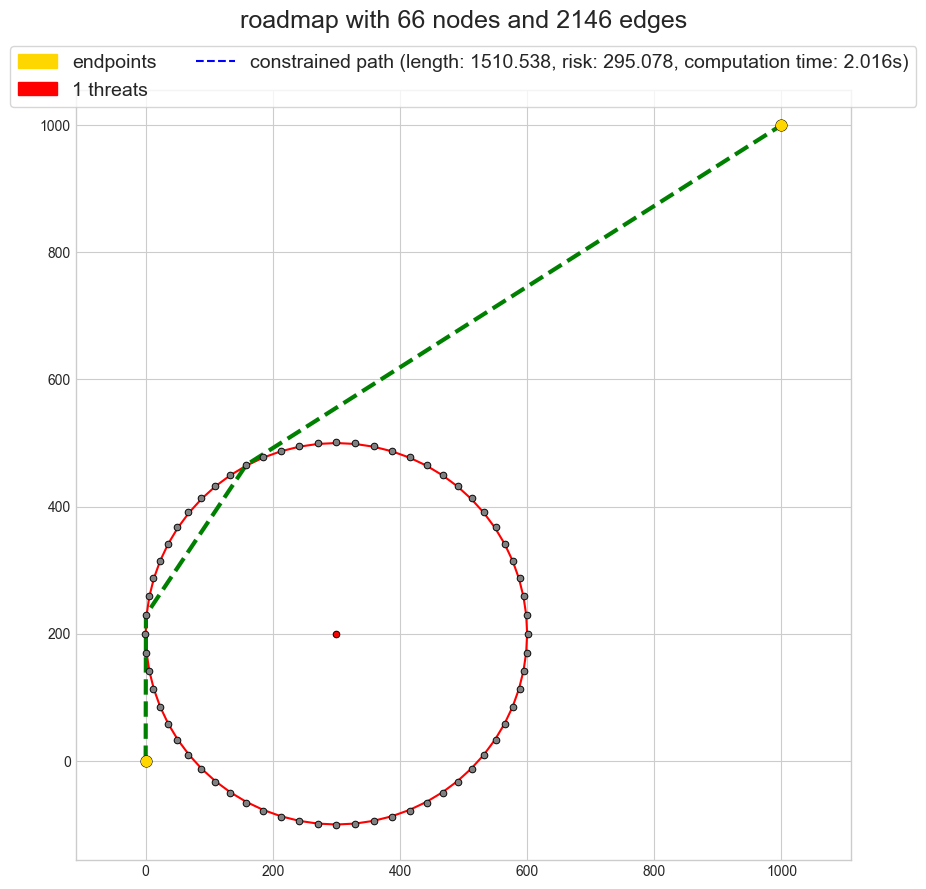

In [15]:
path, risk, length, time = constrained_path_300, constrained_risk_300, constrained_length_300, constrained_time_300
rm.plot(display_edges=False)
plt.plot([p.x for p in path], [p.y for p in path],
         color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'constrained path (length: {length}, risk: {risk}, computation time: {time + 0}s)')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/constrained_path_examples_300.png')
plt.show()

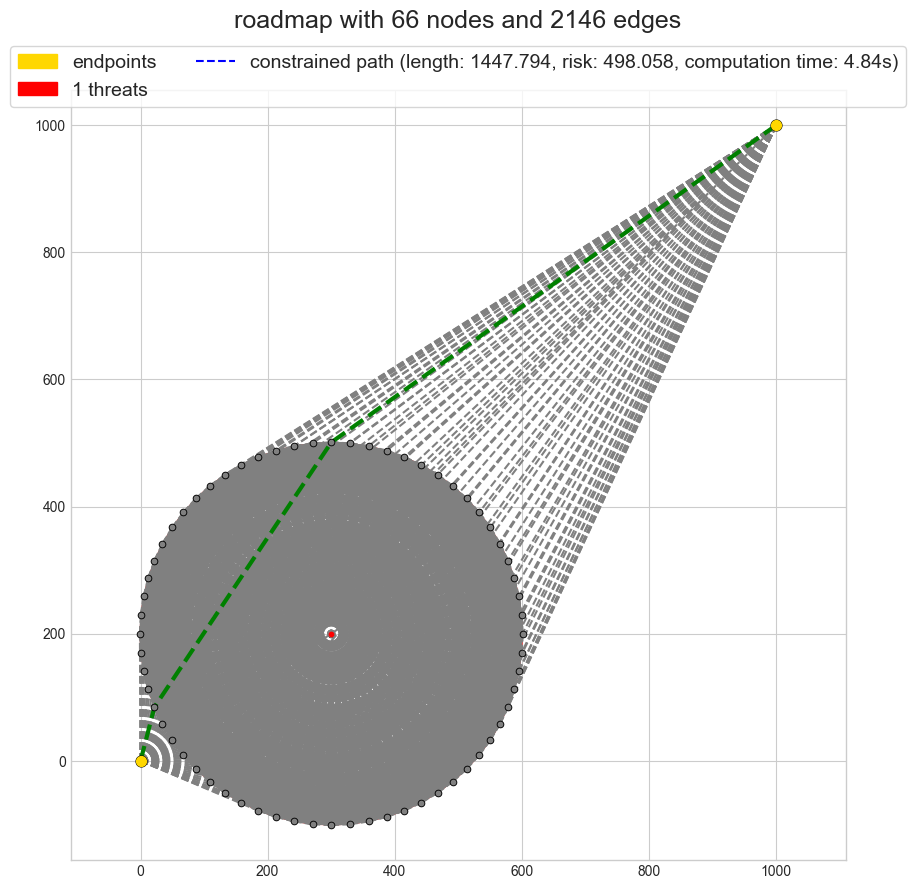

In [16]:
path, risk, length, time = constrained_path_500, constrained_risk_500, constrained_length_500, constrained_time_500
rm.plot(display_edges=True)
plt.plot([p.x for p in path], [p.y for p in path],
         color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'constrained path (length: {length}, risk: {risk}, computation time: {time + 0}s)')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/constrained_path_examples_500.png')
plt.show()